LISN BARN 2010 - 2011

UBSG CSGN 2014 - 2015

11-12

https://quantopian.github.io/pyfolio/notebooks/slippage_example/

In [1]:
import seaborn as sns
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm
from numpy import log, polyfit, sqrt, std, subtract
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import *

import pyfolio as pf

import ffn


from backtester import backtest as bt

%matplotlib inline

In [2]:
PEP = pd.read_csv('UBSG.csv', index_col='Date', parse_dates=True)['Adj Close']
KO =  pd.read_csv('CSGN.csv', index_col='Date', parse_dates=True)['Adj Close']

In [2]:
PEP = pd.read_csv('C:/Users/jango/code/research_env/BTHE/Datalink/csv/UBSG.csv', delimiter=";")
PEP.DATE = pd.to_datetime(PEP['DATE'].str[:10], dayfirst=True)
PEP = PEP.set_index('DATE')
PEP = PEP.CLOSE

KO = pd.read_csv('C:/Users/jango/code/research_env/BTHE/Datalink/csv/CSGN.csv', delimiter=";")
KO.DATE = pd.to_datetime(KO['DATE'].str[:10], dayfirst=True)
KO = KO.set_index('DATE')
KO = KO.CLOSE

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


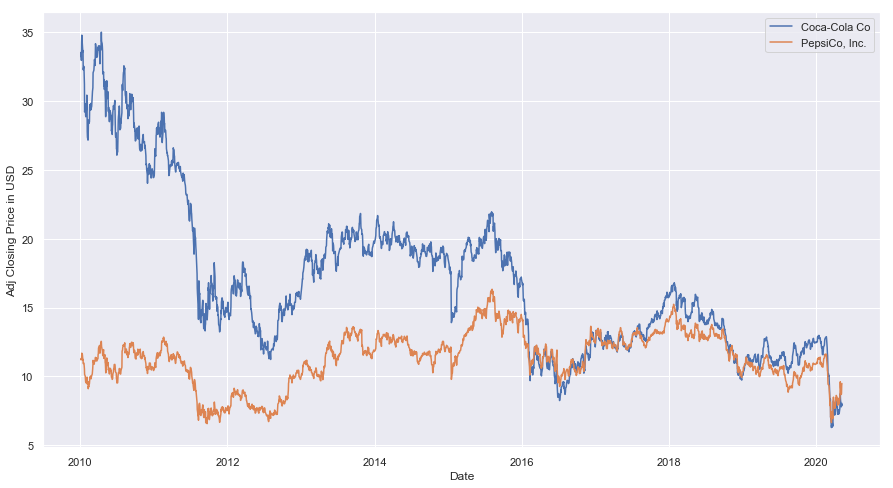

In [3]:
sns.set(rc={'figure.figsize':(15,8)})
c1 = plt.plot(KO, label='Coca-Cola Co')
c1 = plt.plot(PEP, label='PepsiCo, Inc.')
c1 = plt.legend()
c1 = plt.xlabel("Date")
c1 = plt.ylabel("Adj Closing Price in USD")

In [5]:
c1.figure.savefig("closing_prices.png")

In [9]:
start = "2014-01-01"
mid = "2015-01-01"
PEP_norm = (1 + PEP[start:mid].pct_change()).cumprod()
KO_norm = (1 + KO[start:mid].pct_change()).cumprod()
PEP_norm[0] = 1
KO_norm[0] = 1

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


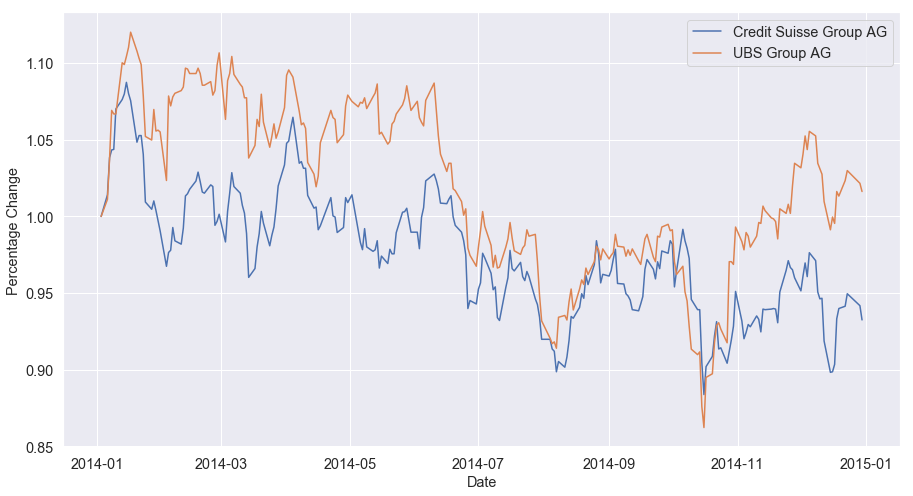

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()
c1 = plt.plot(KO_norm, label='Credit Suisse Group AG')
c1 = plt.plot(PEP_norm, label='UBS Group AG')
c1 = ax.tick_params(labelsize='large')
c1 = plt.legend(fontsize='large')
c1 = plt.xlabel("Date", fontsize="large")
c1 = plt.ylabel("Percentage Change", fontsize="large")

In [9]:
c1.figure.savefig("norm_2015.png")

In [10]:
s = np.sum((PEP_norm-KO_norm)**2)

In [11]:
s

0.9140998237264149

In [13]:
df = pd.DataFrame()
df["CSGN"] = PEP_norm
df['UBSG'] = KO_norm

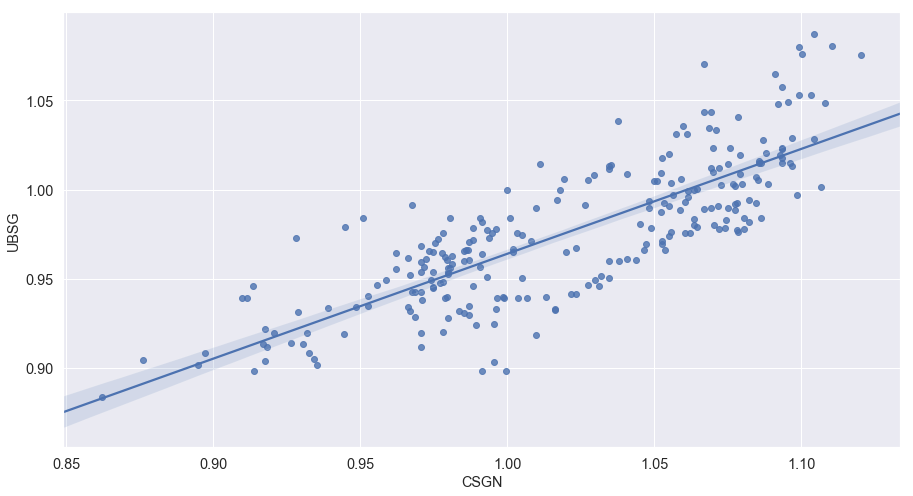

In [14]:

fig, ax = plt.subplots()
scat = sns.regplot(x="CSGN", y="UBSG", data=df)
scat = ax.tick_params(labelsize='large')
scat = plt.xlabel("CSGN", fontsize="large")
scat = plt.ylabel("UBSG", fontsize="large")

#scat.set(xlabel='PepsiCo, Inc.', ylabel='Coca-Cola Co')

In [15]:
scat.figure.savefig("scatter.png")

In [6]:
start = "2015-01-01"
mid = "2015-07-01"
tPEP = (1 + PEP[start:mid].pct_change()).cumprod()
tKO = (1 + KO[start:mid].pct_change()).cumprod()
tPEP[0] = 1
tKO[0] = 1

In [7]:
spread = tPEP - tKO

In [10]:
for_spread = PEP_norm - KO_norm
mean = np.mean(for_spread)
stdev = np.std(for_spread)
upper = mean+2*stdev
lower = mean-2*stdev

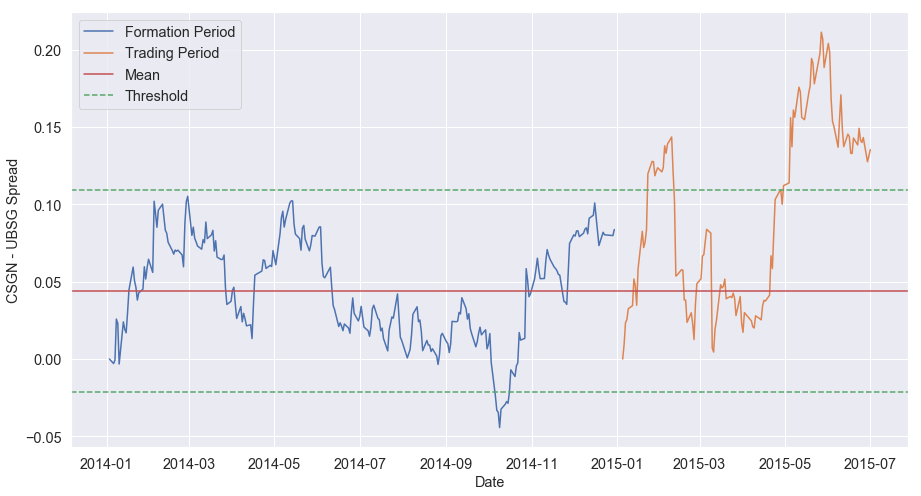

In [20]:
fig, ax = plt.subplots()
sprd = plt.plot(for_spread, label='Formation Period')
sprd = plt.plot(spread, label='Trading Period')
sprd = plt.axhline(mean, color='r', linestyle='-', label='Mean')
sprd = plt.axhline(upper, color='g', linestyle='--', label='Threshold')
sprd = plt.axhline(lower, color='g', linestyle='--')
sprd = ax.tick_params(labelsize='large')
sprd = plt.legend(fontsize='large')
sprd = plt.ylabel("CSGN - UBSG Spread", fontsize="large")
sprd = plt.xlabel("Date", fontsize="large")

In [21]:
sprd.figure.savefig("formAtrading.png")

In [11]:
spread = pd.DataFrame(spread).ffill()

In [12]:
spread = pd.DataFrame(spread).ffill()
spread['ret'] = 0
spread.loc['2015-02-11':'2015-02-18', 'ret'] = 1
spread.loc['2015-04-29': , 'ret'] = 1

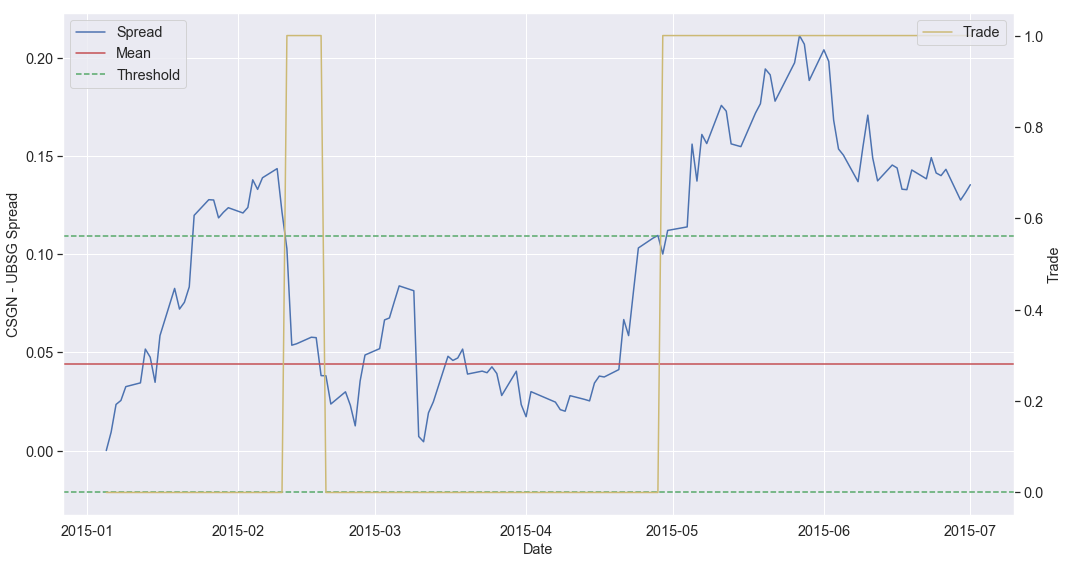

In [35]:
fig, ax1 = plt.subplots()

trad = ax1.plot(spread['Adj Close'], label='Spread')
trad = ax1.axhline(mean, color='r', linestyle='-', label='Mean')
trad = ax1.axhline(upper, color='g', linestyle='--', label='Threshold')
trad = ax1.axhline(lower, color='g', linestyle='--')
trad = ax1.legend(loc=2, fontsize="large")
trad = ax1.set_ylabel("CSGN - UBSG Spread", fontsize="large")
trad = ax1.set_xlabel("Date", fontsize="large")
trad = ax1.tick_params(labelsize='large')

ax2 = ax1.twinx()

trad = ax2.plot(spread['ret'], color='y', label='Trade')
trad = ax2.set_ylabel('Trade', fontsize="large")
trad = ax2.legend(loc=1, fontsize="large")
trad = ax2.tick_params(labelsize='large')
trad = ax2.grid(False)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [36]:
trad.figure.savefig("tradeexpl.png")

AttributeError: 'NoneType' object has no attribute 'figure'

In [13]:
start = "2015-01-01"
mid = "2015-07-01"

df = pd.DataFrame()
df['UBSN'] = PEP[start:mid]
df['CSGN'] = KO[start:mid]
df['spread'] = spread['Adj Close']
df['previous_spread'] = spread['Adj Close'].shift(1)

df['UBSN_norm'] = (1 + df['UBSN'].pct_change()).cumprod()
df['CSGN_norm'] = (1 + df['CSGN'].pct_change()).cumprod()

In [14]:
df['shortsignal'] = ((df.spread < upper) & (df.previous_spread > upper))
df['longsignal'] = ((df.spread > lower) & (df.previous_spread < lower))
df['closelong'] = np.where(df.spread > mean, 1, 0)
df['closeshort'] = np.where(df.spread < mean, 1, 0)

In [15]:
ret = bt(df, 'UBSN', 'CSGN')

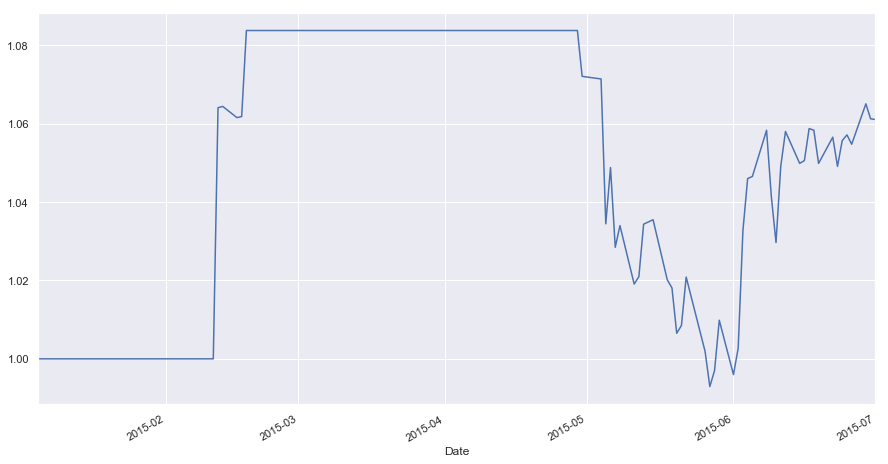

In [16]:
ret.cum_returns.plot()

In [17]:
perf = ret.cum_returns.calc_stats() 
perf.display()

Stats for cum_returns from 2015-01-05 00:00:00 - 2015-07-01 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
6.11%                0.9  13.01%  -8.38%

Annualized Returns:
mtd     3m      6m    ytd    1y    3y    5y    10y    incep.
------  ------  ----  -----  ----  ----  ----  -----  --------
-0.02%  -2.10%  -     6.11%  -     -     -     -      13.01%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.90     0.76       -
mean    13.32%   13.13%     -
vol     14.84%   17.23%     -
skew    2.37     0.27       -
kurt    19.20    -0.13      -
best    6.41%    8.38%      -
worst   -3.45%   -5.80%     -

Drawdowns:
max     avg       # days
------  ------  --------
-8.38%  -4.33%        32

Misc:
---------------  ------
avg. up month    6.73%
avg. down month  -1.73%
up year %        -
12m up %         -
---------------  ------


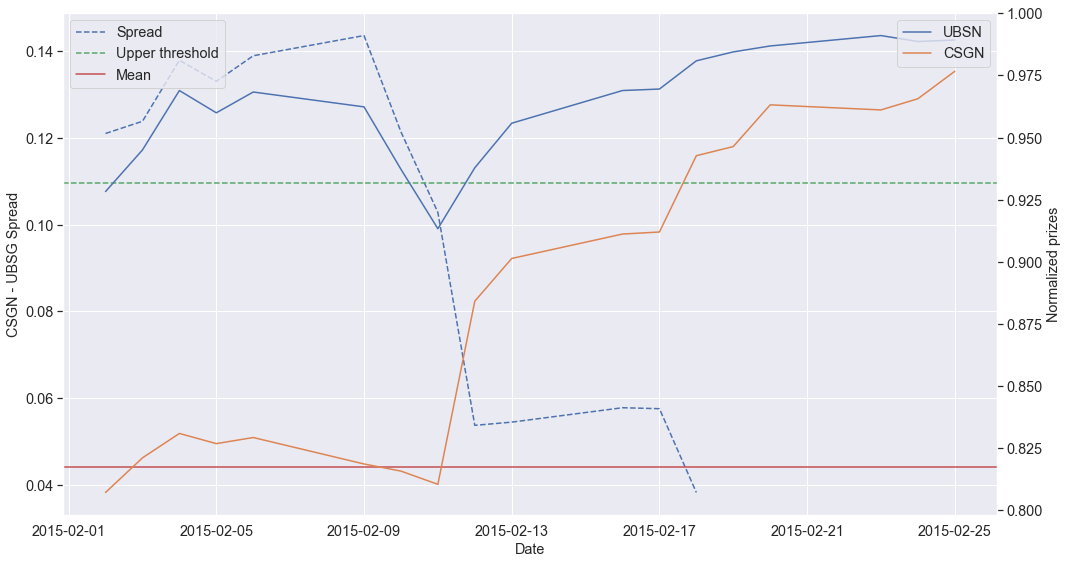

In [32]:
fig, ax1 = plt.subplots()

trad = ax1.plot(df.loc['2015-02-01':'2015-02-18', 'spread'], linestyle='--', label='Spread')
trad = ax1.axhline(upper, color='g', linestyle='--', label='Upper threshold')
trad = ax1.axhline(mean, color='r', label='Mean')
trad = ax1.set_ylabel("CSGN - UBSG Spread", fontsize="large")
trad = ax1.set_xlabel("Date", fontsize="large")
trad = ax1.tick_params(labelsize='large')
trad = ax1.legend(loc=2, fontsize="large")

ax2 = ax1.twinx()

trad = ax2.plot(df.loc['2015-02-01':'2015-02-25', 'UBSN_norm'], label='UBSN')
trad = ax2.plot(df.loc['2015-02-01':'2015-02-25', 'CSGN_norm'], label='CSGN')
trad = ax2.set_ylabel('Normalized prizes', fontsize="large")
trad = ax2.legend(loc=1, fontsize="large")
trad = ax2.tick_params(labelsize='large')
trad = ax2.grid(False)
fig.tight_layout() 
plt.show()

In [33]:
trad.figure.savefig("first_trade.png")

AttributeError: 'NoneType' object has no attribute 'figure'

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\pyfolio\tears.py:200: UserWarning: The latest version of pyfolio requires users to supply benchmark returns. Your current tearsheets will not include plots and analyses that require a benchmark. In the future, please pass benchmark_rets, or pass None to silence this warning.
  warnings.warn(BENCHMARK_RETS_WARNING)
C:\Users\jango\Anaconda3\envs\research\lib\site-packages\empyrical\stats.py:1511: RuntimeWarning: invalid value encountered in double_scalars
  np.abs(np.percentile(returns, 5))


Start date,2015-01-05
End date,2015-07-01
Total months,5
,Backtest
Annual return,18.3%
Cumulative returns,8.5%
Annual volatility,9.7%
Sharpe ratio,1.78
Calmar ratio,64.17
Stability,0.56
Max drawdown,-0.3%


C:\Users\jango\Anaconda3\envs\research\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.29,2015-02-13,2015-02-16,2015-02-18,4
1,0.00,2015-01-05,2015-01-05,2015-01-05,1
2,0.00,2015-01-05,2015-01-05,2015-01-05,1
3,0.00,2015-01-05,2015-01-05,2015-01-05,1
4,0.00,2015-01-05,2015-01-05,2015-01-05,1


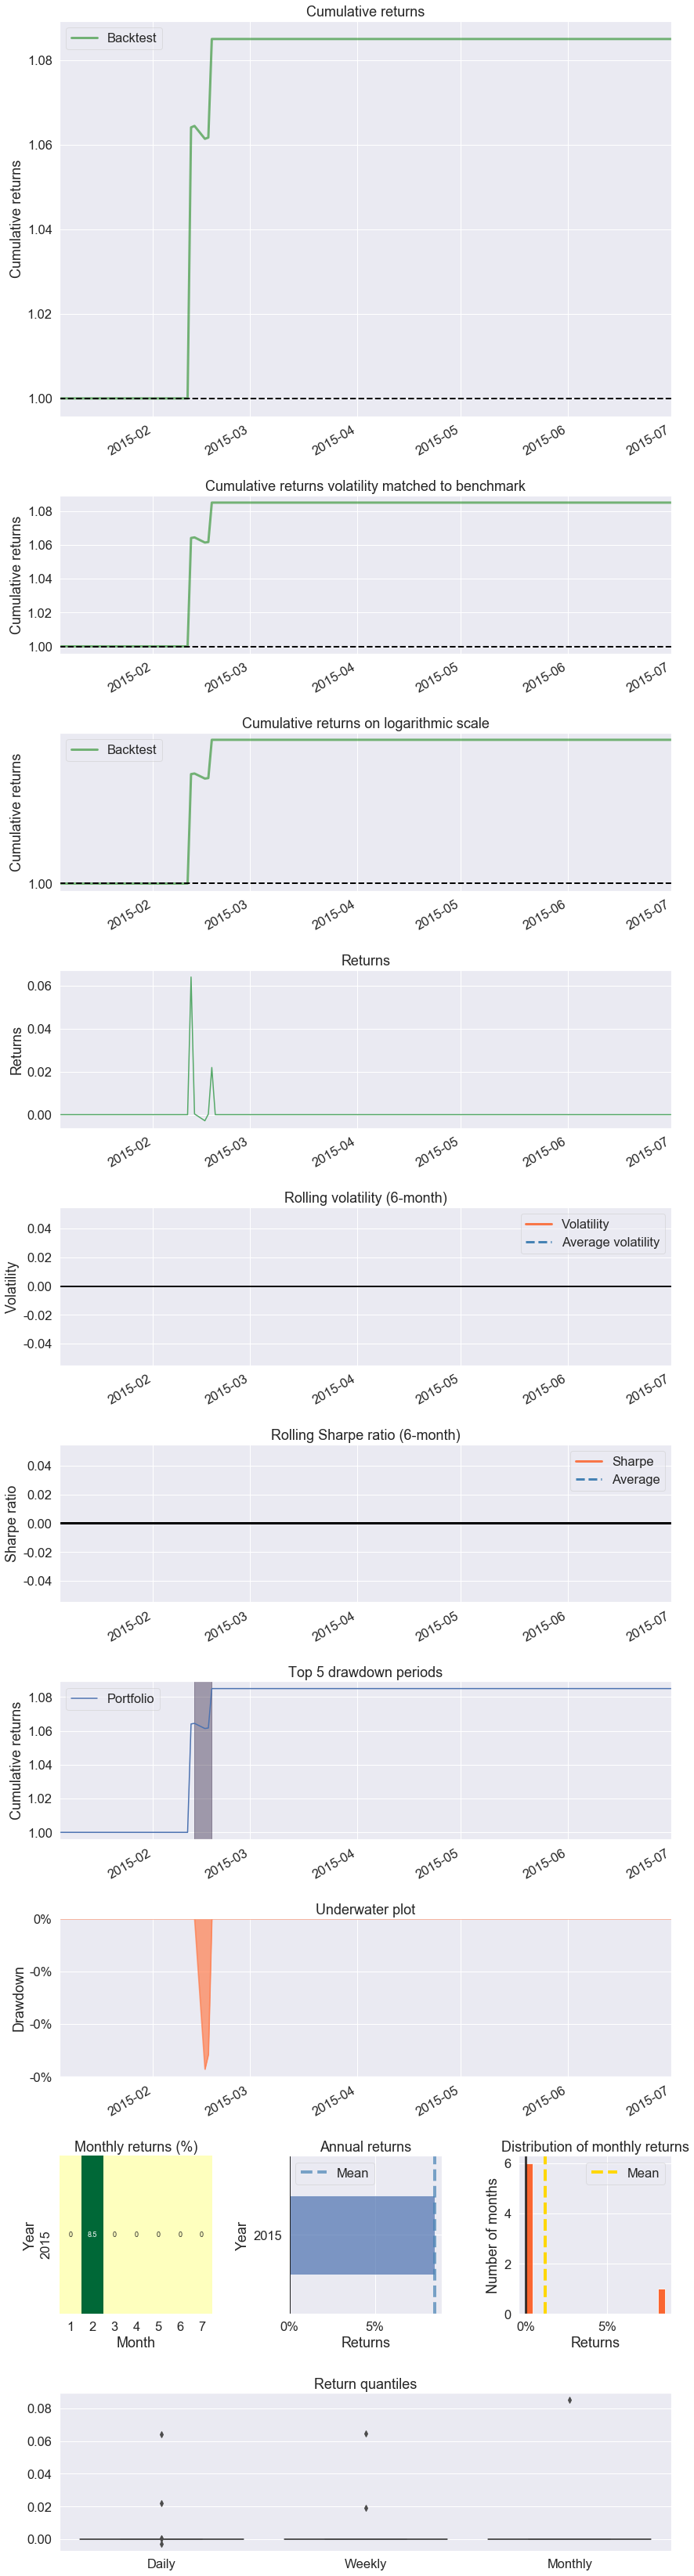

Stress Events,mean,min,max
New Normal,0.07%,-0.29%,6.41%


AttributeError: 'NoneType' object has no attribute 'copy'

In [33]:
pf.create_full_tear_sheet(ret['returns'])